In [1]:
import pandas as pd

# Load dataset
file_path = "Liver Data.csv"  # Change if needed
df = pd.read_csv(file_path)

# Dimensions
print("Shape of the dataset:", df.shape)


Shape of the dataset: (30691, 11)


In [2]:
# Summary statistics for both numeric and categorical columns
print("\nSummary Statistics:\n", df.describe(include='all'))


Summary Statistics:
         Age of the patient Gender of the patient  Total Bilirubin  \
count         30689.000000                 29789     30043.000000   
unique                 NaN                     2              NaN   
top                    NaN                  Male              NaN   
freq                   NaN                 21986              NaN   
mean             44.107205                   NaN         3.370319   
std              15.981043                   NaN         6.255522   
min               4.000000                   NaN         0.400000   
25%              32.000000                   NaN         0.800000   
50%              45.000000                   NaN         1.000000   
75%              55.000000                   NaN         2.700000   
max              90.000000                   NaN        75.000000   

        Direct Bilirubin   Alkphos Alkaline Phosphotase  \
count       30130.000000                   29895.000000   
unique               NaN       

In [3]:
# Data Types
print("\nData Types:\n", df.dtypes)

# Missing values
print("\nNumber of missing values:\n", df.isnull().sum())

# Duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())



Data Types:
 Age of the patient                      float64
Gender of the patient                    object
Total Bilirubin                         float64
Direct Bilirubin                        float64
 Alkphos Alkaline Phosphotase           float64
 Sgpt Alamine Aminotransferase          float64
Sgot Aspartate Aminotransferase         float64
Total Protiens                          float64
 ALB Albumin                            float64
A/G Ratio Albumin and Globulin Ratio    float64
Result                                    int64
dtype: object

Number of missing values:
 Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin an

In [4]:
import numpy as np

# Remove duplicates
df = df.drop_duplicates()

# Fill missing values (numeric → mean, categorical → mode)
for col in df.columns:
    if df[col].dtype in [np.float64, np.int64]:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after cleaning:\n", df.isnull().sum())



Missing values after cleaning:
 Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64


/tmp/ipython-input-2153061586.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-2153061586.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

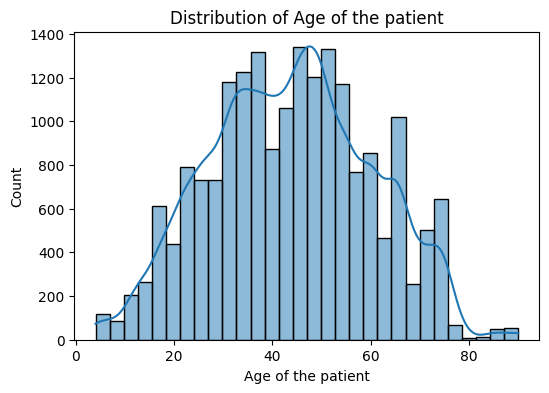

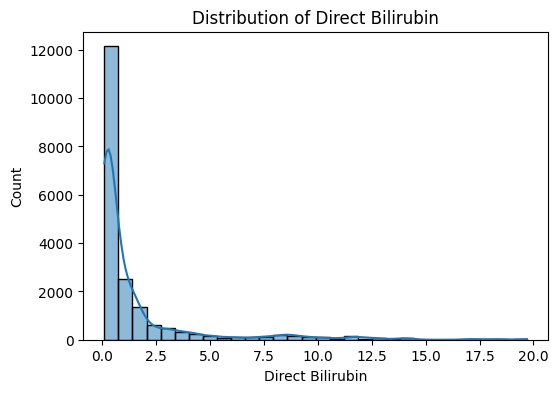

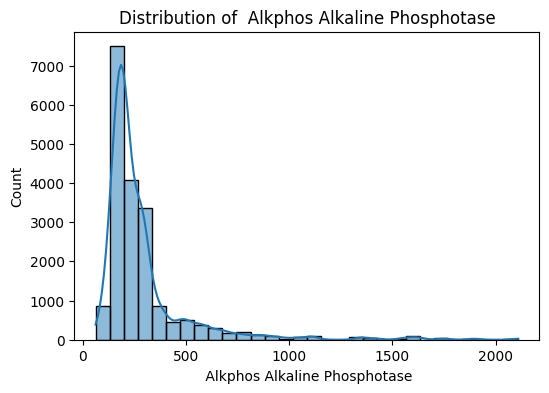

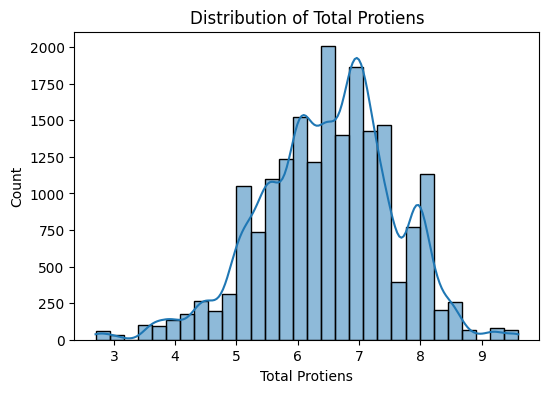

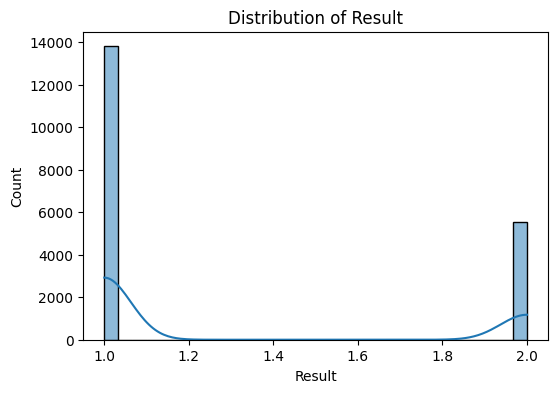

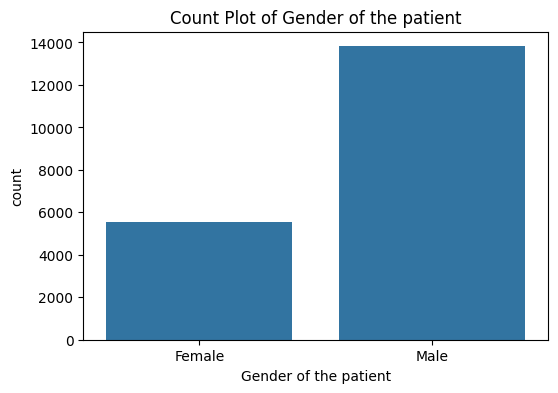

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Numeric distributions
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical distributions
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.show()


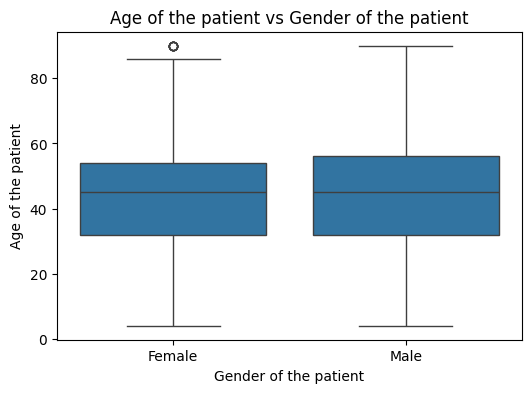

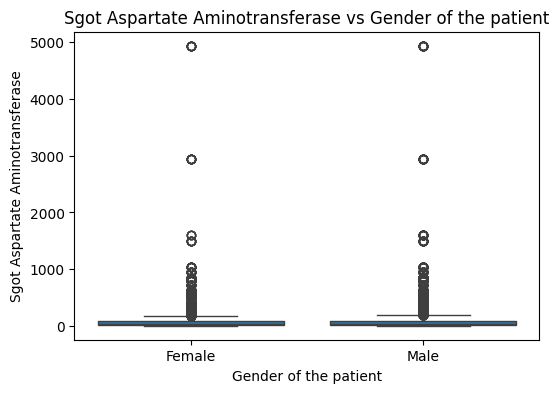

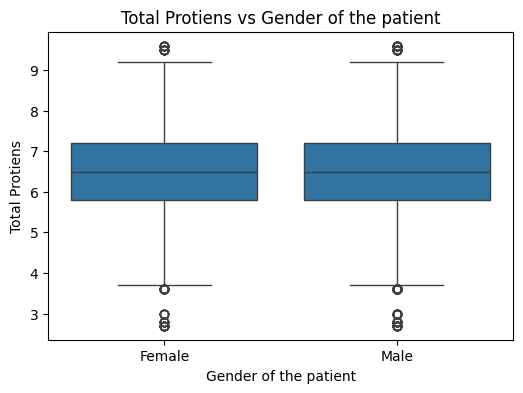

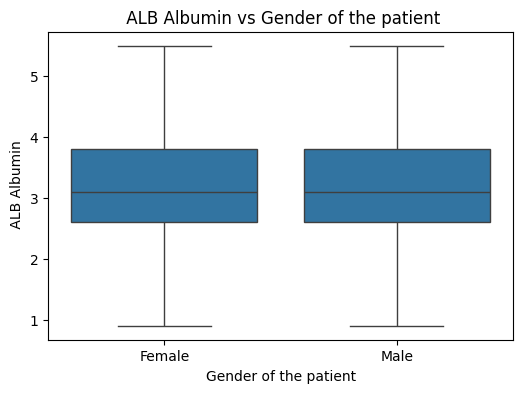

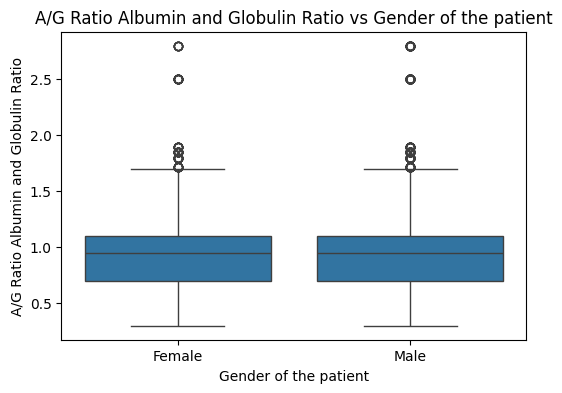

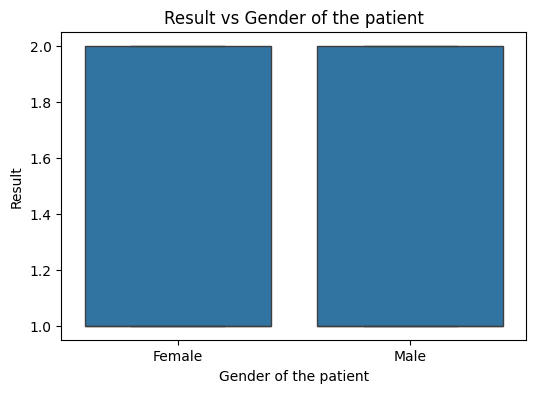

In [6]:
# Scatter plots for numeric columns
sns.pairplot(df[numeric_cols])
plt.show()

# Boxplots: numeric vs categorical
for cat in categorical_cols:
    for num in numeric_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x=cat, y=num)
        plt.title(f'{num} vs {cat}')
        plt.show()


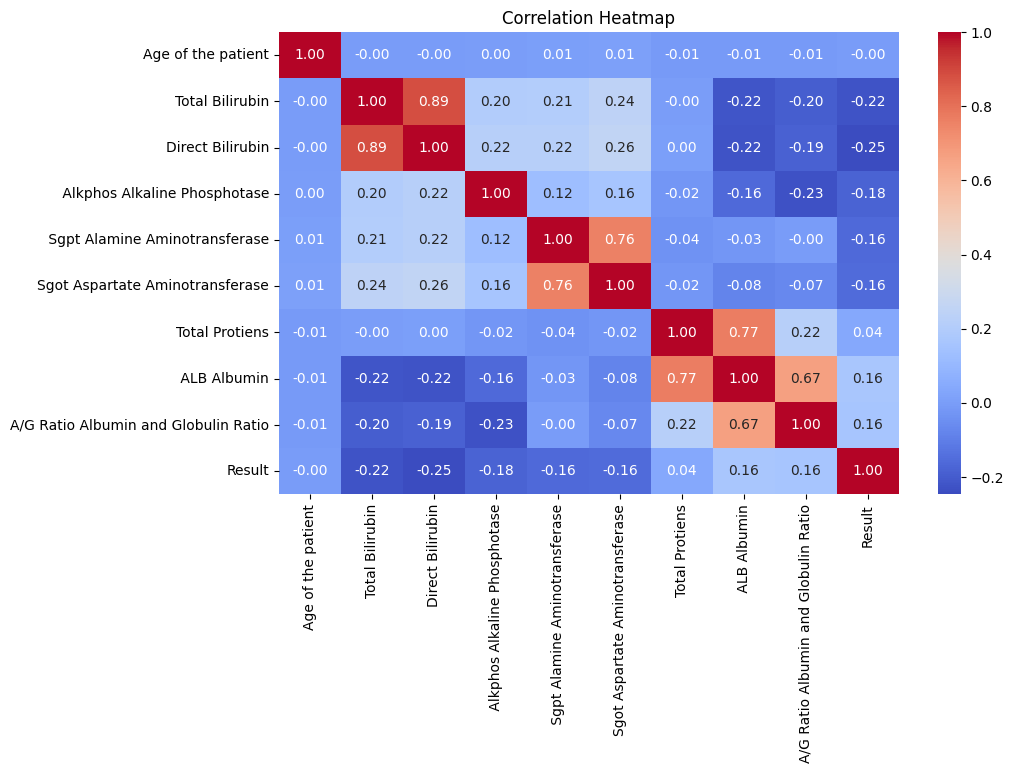

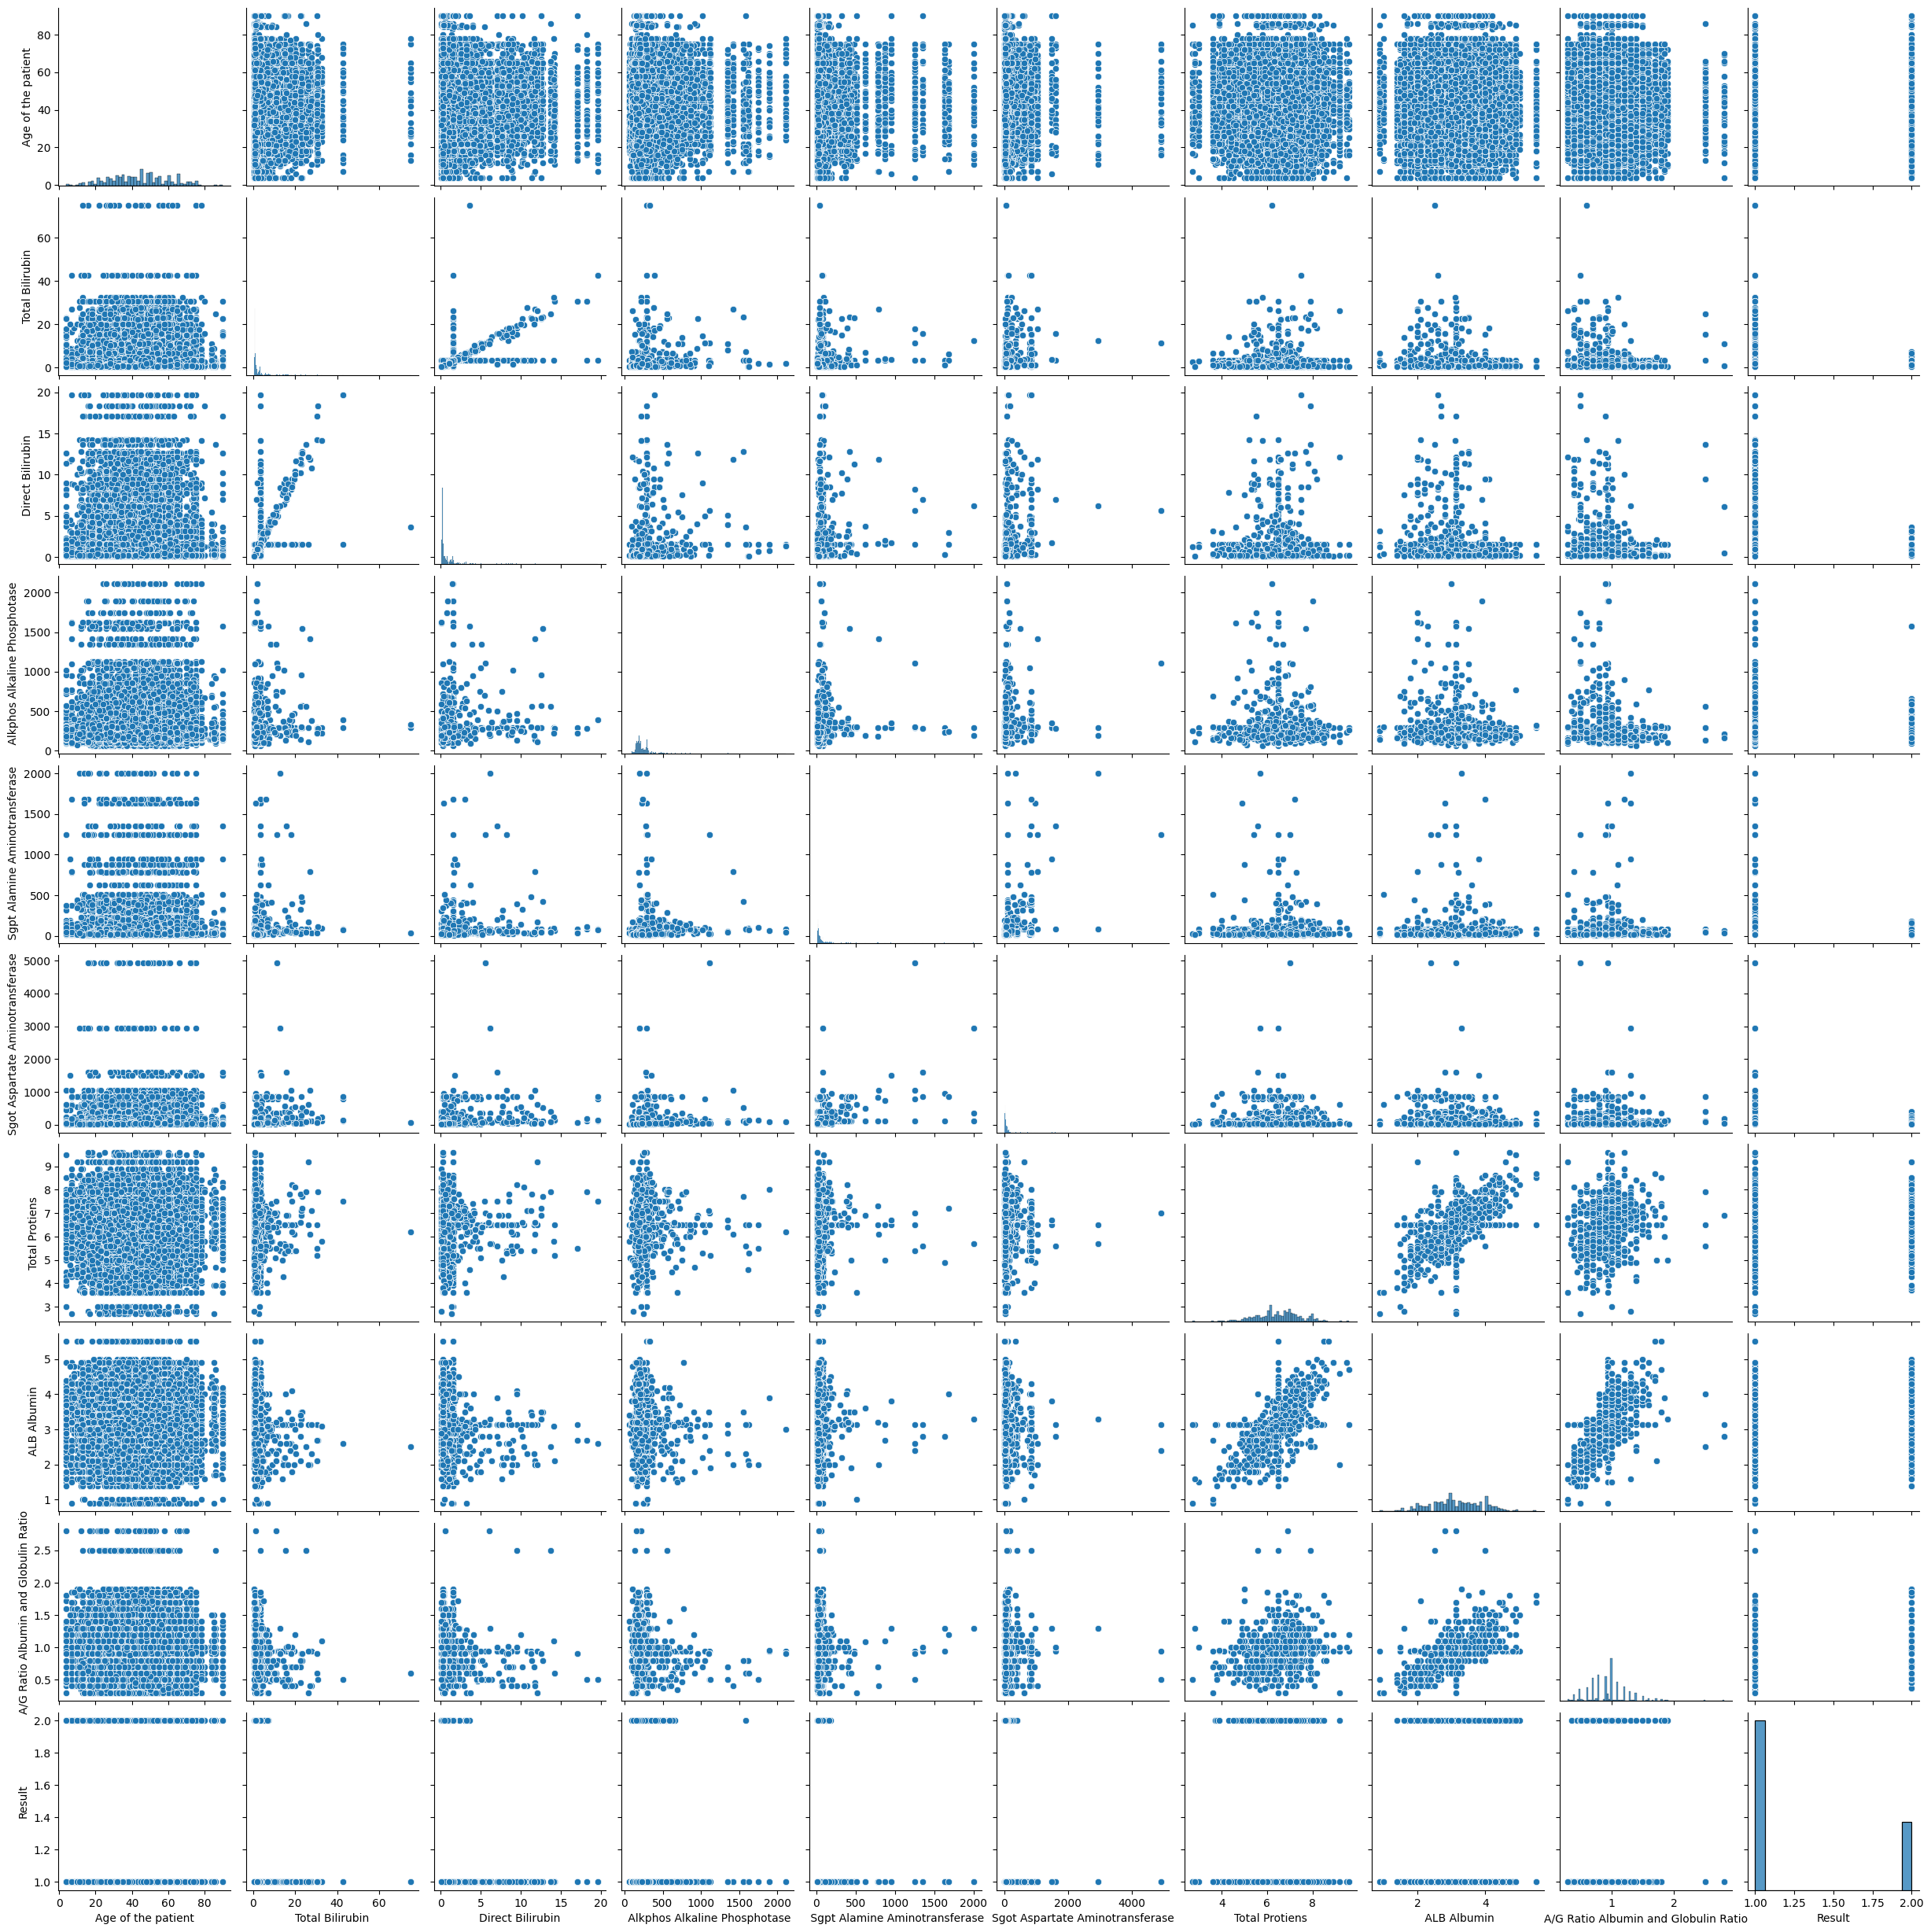

In [7]:
# Correlation heatmap
plt.figure(figsize=(10,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for all columns
sns.pairplot(df)
plt.show()

# Crosstab for categorical variables
if len(categorical_cols) > 1:
    for i in range(len(categorical_cols)):
        for j in range(i+1, len(categorical_cols)):
            cross_tab = pd.crosstab(df[categorical_cols[i]], df[categorical_cols[j]])
            print(f"\nCrosstab between {categorical_cols[i]} and {categorical_cols[j]}:\n", cross_tab)


In [8]:
import pandas as pd
